In [20]:
import pandas as pd
import tensorflow as tf
import numpy as np
import os
import contractions
import re
import matplotlib.pyplot as plt

In [21]:
data = pd.read_csv('data/train.csv', encoding = 'ISO-8859-1')
data = data.dropna(subset='text')
data

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26
...,...,...,...,...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,night,31-45,Ghana,31072940,227540.0,137
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,morning,46-60,Greece,10423054,128900.0,81
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,noon,60-70,Grenada,112523,340.0,331
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,night,70-100,Guatemala,17915568,107160.0,167


In [22]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
from nltk.corpus import wordnet

In [23]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(data['sentiment'])

In [33]:
stopword = stopwords.words('english') #179
len(stopword)
text_data = data['text'].values
stopword

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [25]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nguye\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nguye\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nguye\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def tweet_cleaner_without_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = contractions.fix(new_text)    
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)    
    new_text = new_text.lower().strip()
    new_text = [x for x in new_text.split() if x not in stopword]
    cleaned_text = ''
    for token in new_text:
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '
    
    return cleaned_text

In [30]:
text_data[1]

' Sooo SAD I will miss you here in San Diego!!!'

In [39]:
clean_data = []
for x in text_data:
    x_fixed = tweet_cleaner_without_stopwords(x)
    clean_data.append(x_fixed)
clean_data

['responded going ',
 'sooo sad miss san diego ',
 'bos bullying ',
 'interview leave alone ',
 'son put release already bought ',
 'shameless plugging best ranger forum earth ',
 'feeding baby fun smile coo ',
 'soooo high ',
 '',
 'journey wow became cooler hehe possible ',
 'much love hopeful reckon chance minimal p never going get cake stuff ',
 'really really like song love story taylor swift ',
 'sharpie running dangerously low ink ',
 'want go music tonight lost voice ',
 'test test lg env ',
 'uh oh sunburned ',
 'ok trying plot alternative speak sigh ',
 'sick past day thus hair look wierd hat would look ',
 'back home going miss every one ',
 'he ',
 'oh marly sorry hope find soon ',
 'playing ghost online really interesting new update kirin pet metamorph third job wait dragon pet ',
 'cleaning house family comming later today ',
 'got restart computer thought win supposed put end constant rebootiness ',
 'see wat mean bout foll w friidays called lose f llowers friday smh ',


In [41]:
collected_words = []
for x in clean_data:
    collected_words.extend(x.split())
len(collected_words)

187997

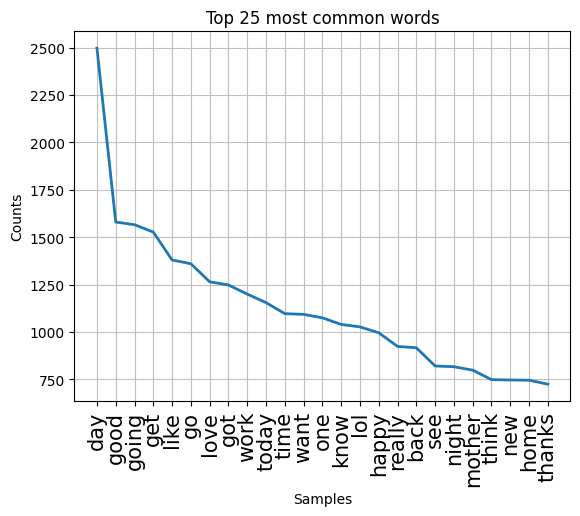

['responded going ',
 'sooo sad miss san diego ',
 'bos bullying ',
 'interview leave alone ',
 'son put release already bought ',
 'shameless plugging best ranger forum earth ',
 'feeding baby fun smile coo ',
 'soooo high ',
 '',
 'journey wow became cooler hehe possible ',
 'much love hopeful reckon chance minimal p never going get cake stuff ',
 'really really like song love story taylor swift ',
 'sharpie running dangerously low ink ',
 'want go music tonight lost voice ',
 'test test lg env ',
 'uh oh sunburned ',
 'ok trying plot alternative speak sigh ',
 'sick past day thus hair look wierd hat would look ',
 'back home going miss every one ',
 'he ',
 'oh marly sorry hope find soon ',
 'playing ghost online really interesting new update kirin pet metamorph third job wait dragon pet ',
 'cleaning house family comming later today ',
 'got restart computer thought win supposed put end constant rebootiness ',
 'see wat mean bout foll w friidays called lose f llowers friday smh ',


In [42]:
freq_dist = nltk.FreqDist(collected_words)
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)
freq_dist.plot(25, cumulative=False)
#list top 25 frequent words
count = 0
for x in clean_data:
    if type(x) != str:
        count = count + 1
count
clean_data

In [60]:
one  = 0
two = 0 
zero = 0
for x in encoded_labels:
    if x == 0:
        zero += 1
    elif x == 1:
        one += 1
    else:
        two += 1

8582

In [69]:
from sklearn.feature_extraction.text import CountVectorizer
CV = CountVectorizer(max_features=2000)
trans = CV.fit_transform(clean_data)
dense_matrix = trans.todense()
df = pd.DataFrame(dense_matrix, columns=CV.get_feature_names_out())
#zero: 7781
#one: 11117
#two: 8582


In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dense_matrix, encoded_labels, test_size= 0.25, random_state=42)
pd.DataFrame(X_train, columns=CV.get_feature_names_out())
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)

In [75]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score
model = LogisticRegression(multi_class='ovr', max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)
# print(accuracy_score(y_test, y_pred))  # train score)
# model = SGDClassifier(
#     loss = 'log_loss',
#     max_iter=1000,
#     random_state=42,
#     alpha= 0.0001,
#     penalty='l2'
# )
# model.fit(X_train, y_train)
# print(model.score(X_train, y_train))

C:\Users\nguye\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


TypeError: np.matrix is not supported. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold